## Face Detection and Recognition Benchmarks on CPU

The purpose of this notebook is to compare the performances of the face detection and face recognition models we are experimenting with. 

Detection Models: 
- Dlib CNN Face Detector
- Dlib DNN Face Detector
- MTCNN

Recognition Models: 
- Openface
- FaceNet

There is no parallelization used to generate these processing times. 
Environment: Intel(R) Core(TM) i9-9980HK CPU @2.40GHz

In [1]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import os

In [3]:
paths = {'cpu': 'benchmarks_cpu/', 'gpu':'benchmarks_gpu/'}

In [4]:
detection = ['cnn', 'dnn', 'mtcnn']
recognition = ['openface', 'facenet']

### Detection Algorithms CPU and GPU Times

In [5]:
def generate_dataframes(paths, arr):
    def read_file(file, key, path):
        fn = file.split('.')[0]
        dataframe_name = fn + '_' + key
        df = pd.read_csv(path+file, names=['filename', 'time_'+ dataframe_name])
        df.name = dataframe_name
        print(df.name, 'generated')
        return df
    dfs = [read_file(file, key, path) for key,path in paths.items() for file in os.listdir(path) if file.split('.')[0] in arr]
    return dfs

In [6]:
detection_dfs = generate_dataframes(paths, detection)

mtcnn_cpu generated
dnn_cpu generated
cnn_cpu generated
mtcnn_gpu generated
dnn_gpu generated
cnn_gpu generated


In [7]:
detection_benchmarks = reduce(lambda left,right: pd.merge(left,right,on='filename', how='outer'), detection_dfs)

In [17]:
detection_benchmarks.head(5)

filename  time_mtcnn_cpu  time_dnn_cpu  time_cnn_cpu  time_mtcnn_gpu  \
0   1-5-2a-1.png        1.001762      0.038859      0.274491        1.166727   
1   2-5-2a-2.png        0.007599      0.015250      0.069252        0.016812   
2  3-10-2a-3.png        0.012839      0.016781      0.273263        0.018840   
3  4-10-2a-4.png        0.004692      0.019225      0.062826        0.011081   
4  5-15-2a-5.png        0.013815      0.019113      0.209756        0.016356   

   time_dnn_gpu  time_cnn_gpu  
0      0.123125      1.674625  
1      0.015680      0.486018  
2      0.019201      1.775414  
3      0.016134      0.378503  
4      0.016303      1.737921

In [8]:
detection_benchmarks.describe()

time_mtcnn_cpu  time_dnn_cpu  time_cnn_cpu  time_mtcnn_gpu  \
count      137.000000    137.000000    137.000000      137.000000   
mean         0.016019      0.018090      0.112161        0.016814   
std          0.084946      0.002090      0.166868        0.099115   
min          0.000949      0.015181      0.013314        0.001393   
25%          0.005512      0.017384      0.045738        0.004964   
50%          0.008329      0.017978      0.067671        0.006720   
75%          0.010896      0.018610      0.120940        0.010545   
max          1.001762      0.038859      1.600804        1.166727   

       time_dnn_gpu  time_cnn_gpu  
count    137.000000    137.000000  
mean       0.017587      0.873486  
std        0.009212      1.204800  
min        0.015227      0.083356  
25%        0.015809      0.355450  
50%        0.016303      0.555080  
75%        0.017292      0.964707  
max        0.123125     10.834434

### CPU Usage of Detection Algorithms

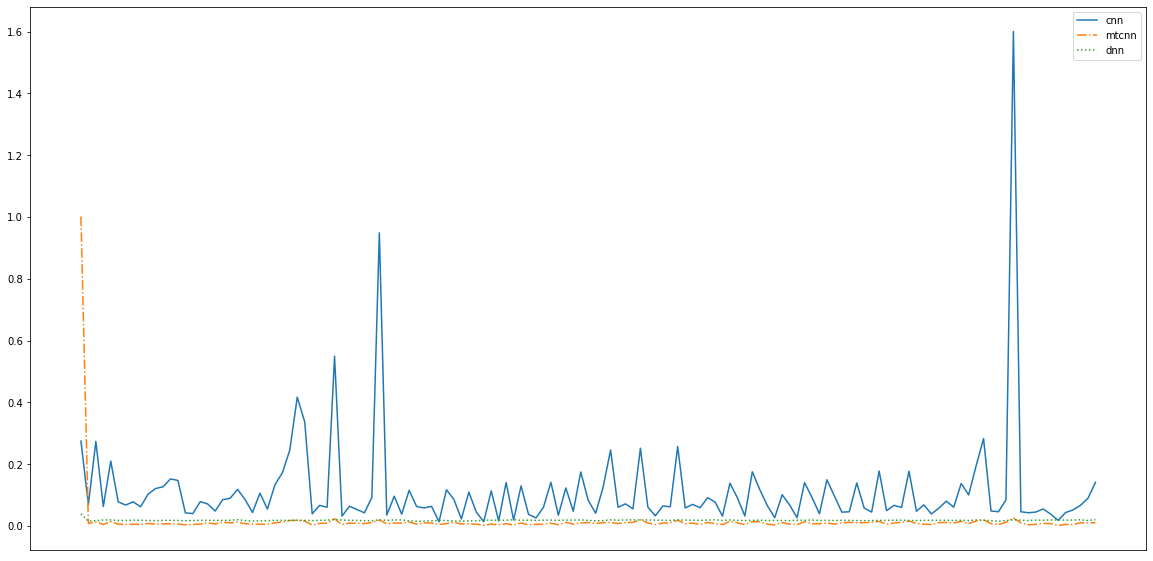

In [9]:
plt.figure(figsize=(20,10))
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_cnn_cpu'], '-', label='cnn')
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_mtcnn_cpu'], '-.', label='mtcnn')
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_dnn_cpu'], ':', label='dnn')
plt.legend(loc='best')
plt.xticks([])
plt.show()

### GPU Usage of Detection Algorithms

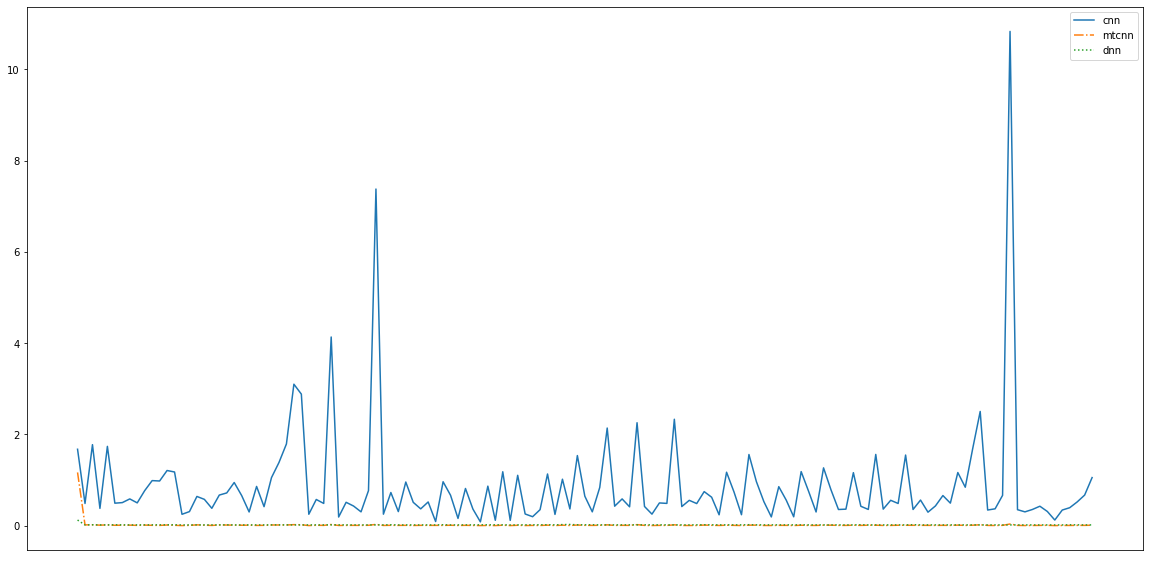

In [10]:
plt.figure(figsize=(20,10))
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_cnn_gpu'], '-', label='cnn')
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_mtcnn_gpu'], '-.', label='mtcnn')
plt.plot(detection_benchmarks['filename'], detection_benchmarks['time_dnn_gpu'], ':', label='dnn')
plt.legend(loc='best')
plt.xticks([])
plt.show()

### Recognition Algorithms CPU and GPU Times

In [11]:
recognition_dfs = generate_dataframes(paths, recognition)

facenet_cpu generated
openface_cpu generated
facenet_gpu generated
openface_gpu generated


In [19]:
recognition_benchmarks = reduce(lambda left,right: pd.merge(left,right,on='filename', how='inner'), recognition_dfs)

In [20]:
recognition_benchmarks.head(5)

filename  time_facenet_cpu  time_openface_cpu  time_facenet_gpu  \
0    1-5-2a-1.png          1.021732           0.343614          2.199863   
1   3-10-2a-3.png          0.035085           0.017184          0.018100   
2   18-5-4a-1.png          0.033127           0.008836          0.018102   
3  20-10-4a-2.png          0.033045           0.008744          0.018048   
4  22-15-4a-3.png          0.033274           0.012124          0.017643   

   time_openface_gpu  
0           1.498525  
1           0.010589  
2           0.007170  
3           0.006833  
4           0.009095

In [21]:
recognition_benchmarks.describe()

time_facenet_cpu  time_openface_cpu  time_facenet_gpu  \
count         43.000000          43.000000         43.000000   
mean           0.056979           0.017755          0.069687   
std            0.150635           0.050922          0.332585   
min            0.030850           0.007350          0.017552   
25%            0.033218           0.008266          0.018652   
50%            0.033997           0.009566          0.018945   
75%            0.034711           0.011390          0.019178   
max            1.021732           0.343614          2.199863   

       time_openface_gpu  
count          43.000000  
mean            0.043280  
std             0.227214  
min             0.006370  
25%             0.006894  
50%             0.008974  
75%             0.009652  
max             1.498525

### CPU Usage of Recognition Algorithms

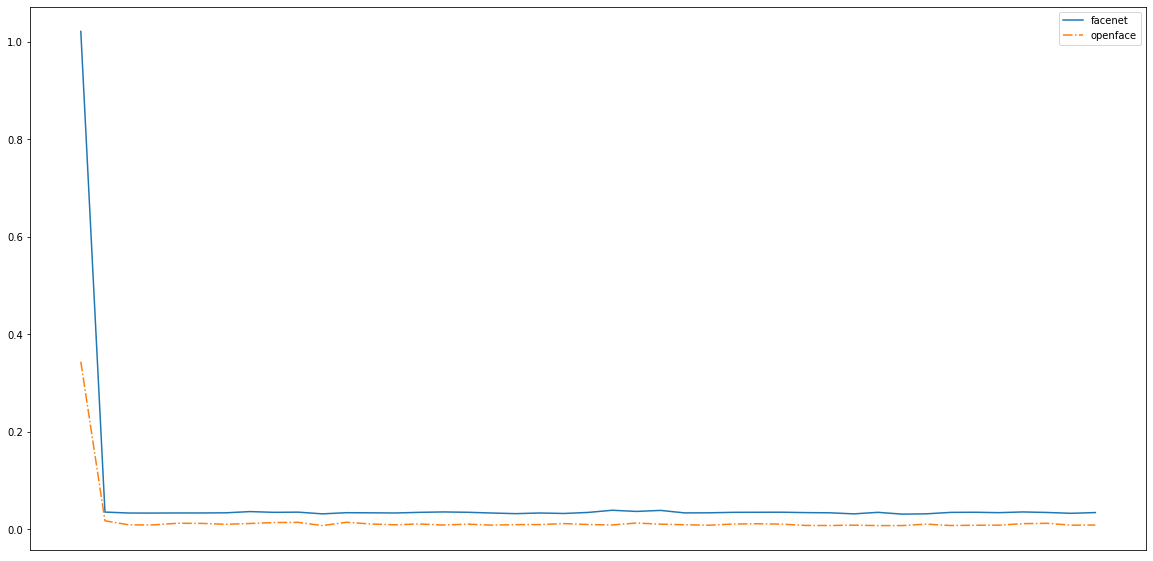

In [22]:
plt.figure(figsize=(20,10))
plt.plot(recognition_benchmarks['filename'], recognition_benchmarks['time_facenet_cpu'], '-', label='facenet')
plt.plot(recognition_benchmarks['filename'], recognition_benchmarks['time_openface_cpu'], '-.', label='openface')
plt.legend(loc='best')
plt.xticks([])
plt.show()

### GPU Usage of Recognition Algorithms

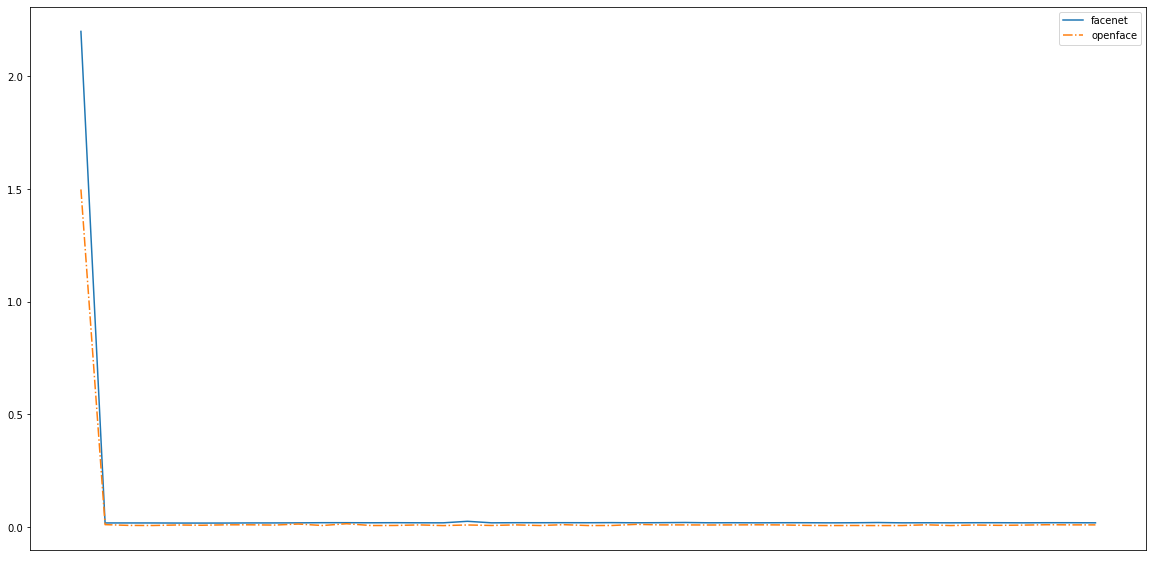

In [23]:
plt.figure(figsize=(20,10))
plt.plot(recognition_benchmarks['filename'], recognition_benchmarks['time_facenet_gpu'], '-', label='facenet')
plt.plot(recognition_benchmarks['filename'], recognition_benchmarks['time_openface_gpu'], '-.', label='openface')
plt.legend(loc='best')
plt.xticks([])
plt.show()

Findings: 
I am not taking advantage of the GPU processing speeds as I am running the model on the images one by one. I will stress test it with parallel requests to see if these stats get better. GPUs can do largely parallel things faster than CPUs, but there is a lot more work to actually setup a program to run on a GPU. That setup work that doesn't directly contribute to the computation I want to perform is called overhead. We have high overhead for single processed images, we won't see speed advantages. 